### A prediction model for Salary_hike

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [37]:
df=pd.read_csv('Salary_Data.csv')
df.head()         

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


### Performing EDA on given Data

In [38]:
df.shape

(30, 2)

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [40]:
df.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [41]:
df[df.duplicated()].shape

(0, 2)

In [42]:
df.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [43]:
df=df.rename({'YearsExperience':'YearsExp'},axis=1)

In [44]:
df

,YearsExp,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0
5,2.9,56642.0
6,3.0,60150.0
7,3.2,54445.0
8,3.2,64445.0
9,3.7,57189.0


### Data Visualization 

{'whiskers': [<matplotlib.lines.Line2D at 0x1972a14b820>,
 'caps': [<matplotlib.lines.Line2D at 0x1972ba9c7f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x1972a14bf70>],
 'medians': [<matplotlib.lines.Line2D at 0x1972a141c10>],
 'fliers': [<matplotlib.lines.Line2D at 0x1972a1420a0>],
 'means': []}

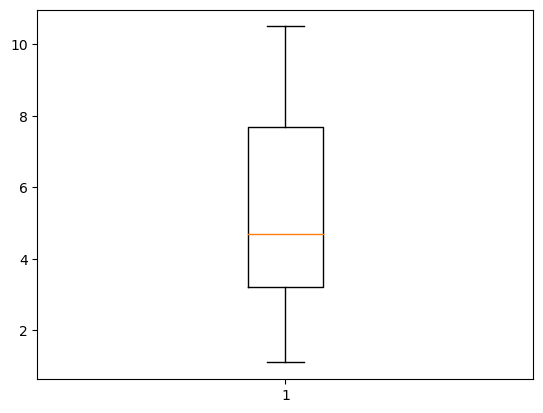

In [45]:
plt.boxplot(df['YearsExp'])

{'whiskers': [<matplotlib.lines.Line2D at 0x1972baf4460>,
 'caps': [<matplotlib.lines.Line2D at 0x1972baf4970>,
 'boxes': [<matplotlib.lines.Line2D at 0x1972a1468b0>],
 'medians': [<matplotlib.lines.Line2D at 0x1972baf7610>],
 'fliers': [<matplotlib.lines.Line2D at 0x1972baf7940>],
 'means': []}

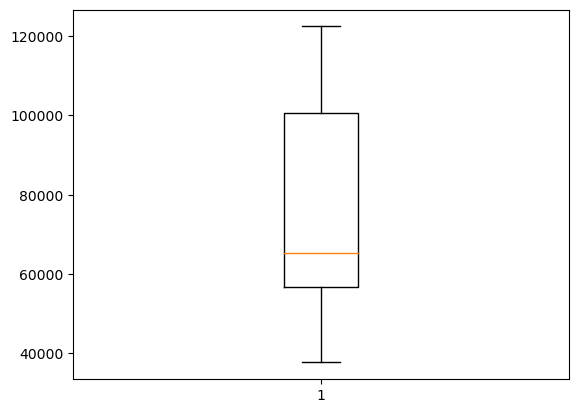

In [46]:
plt.boxplot(df['Salary'])

<AxesSubplot:xlabel='YearsExp', ylabel='Salary'>

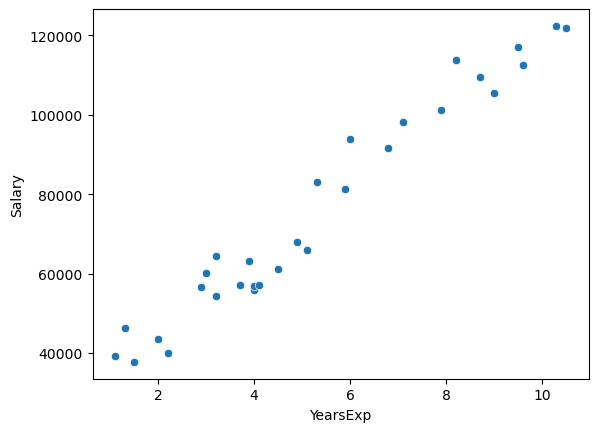

In [47]:
sns.scatterplot(x='YearsExp',y='Salary',data=df)

In [48]:
### Correlation

In [49]:
rel=df.corr()
rel

,YearsExp,Salary
YearsExp,1.000000,0.978242
Salary,0.978242,1.000000


<AxesSubplot:>

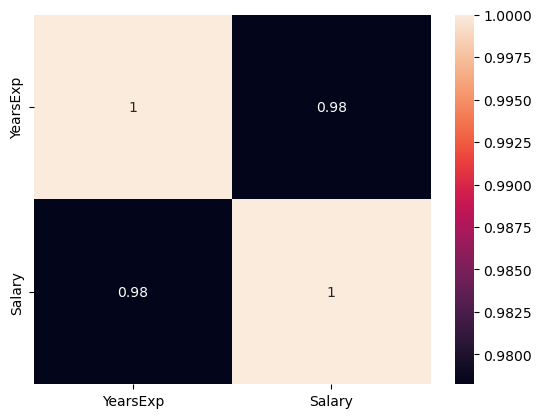

In [50]:
sns.heatmap(rel,annot=True)

### Model Building

In [51]:
import statsmodels.formula.api as sfa

In [52]:
model=sfa.ols('Salary~YearsExp',data=df).fit()

### Model Testing

In [53]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Thu, 29 Dec 2022   Prob (F-statistic):           1.14e-20
Time:                        13:35:29   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExp    9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The required equation will be: y(Salary)=2.58+9449.96*YearsExp

## Predictiction for Salary_hike

In [54]:
newval=pd.Series([5,2,4,9])
newval

0    5
1    2
2    4
3    9
dtype: int64

In [55]:
pred_sal=pd.DataFrame(newval,columns=['YearsExp'])

In [56]:
model.predict(pred_sal)

0     73042.011806
1     44692.124842
2     63592.049484
3    110841.861092
dtype: float64

In [57]:
pred_sal['Pre_salary']=model.predict(pred_sal)

In [58]:
round(pred_sal)

,YearsExp,Pre_salary
0,5,73042.0
1,2,44692.0
2,4,63592.0
3,9,110842.0


In [59]:
'''The model has been build and tested successfully to Predict Salary base on Years of experience.
   It gives 95% of accuracy which means the model as build more correctly to predict the future values.
   So, the model has designed the rule such that when you pass the years of experience it will be give you salary as an output.'''

'The model has been build and tested successfully to Predict delivery time using sorting time.\n   It gives 68% of accuracy which means the 68% of values lies on the line of dataset.So, the model has designed the \n   rule such that when you pass the sorting time will be give you delivery time as an output.'